# Mortgage Prediction using RAPIDS

## Predict Loan Amount for Customer using RAPIDS Libraries 

## By Ghadi Khalid


In [1]:
# organize notebook format
# To expand output so that it shows all data columns 
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# to hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import cudf

# Import Data

In [3]:
# import data [separate the columns and add column names]
df = cudf.read_csv('2020Q3Mortage.csv', sep="|", header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107
0,<NA>,100756259,72020,R,Other,Other,<NA>,3.125,3.125,112000.0,<NA>,112000.0,360,72020,92020,-1.0,361.0,360.0,82050.0,91,95,1,40.0,666.0,<NA>,Y,P,CO,1,P,IL,16980,604.0,25.0,FRM,N,N,<NA>,<NA>,0,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX00,N,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1.0,N,<NA>,<NA>,<NA>,<NA>,Y,<NA>,N,<NA>,<NA>,<NA>,<NA>,A,N,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7,N,<NA>,<NA>,7,<NA>,<NA>
1,<NA>,100756259,82020,R,Other,Other,<NA>,3.125,3.125,112000.0,<NA>,112000.0,360,72020,92020,0.0,360.0,359.0,82050.0,91,95,1,40.0,666.0,<NA>,Y,P,CO,1,P,IL,16980,604.0,25.0,FRM,N,N,<NA>,<NA>,0,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX0000,N,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,188.1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1.0,N,<NA>,<NA>,<NA>,<NA>,Y,<NA>,N,<NA>,<NA>,<NA>,<NA>,A,N,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7,N,<NA>,<NA>,7,<NA>,<NA>
2,<NA>,100756259,92020,R,Other,Other,<NA>,3.125,3.125,112000.0,<NA>,111000.0,360,72020,92020,1.0,359.0,358.0,82050.0,91,95,1,40.0,666.0,<NA>,Y,P,CO,1,P,IL,16980,604.0,25.0,FRM,N,N,<NA>,<NA>,0,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX000000,N,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,191.6,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1.0,N,<NA>,<NA>,<NA>,<NA>,Y,<NA>,N,<NA>,<NA>,<NA>,<NA>,A,N,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7,N,<NA>,<NA>,7,<NA>,<NA>


In [4]:
# add columns names[108 columns] for entire data
df.columns = ["POOL_ID", "LOAN_ID", "ACT_PERIOD", "CHANNEL", "SELLER", "SERVICER",
                        "MASTER_SERVICER", "ORIG_RATE", "CURR_RATE", "ORIG_UPB", "ISSUANCE_UPB",
                        "CURRENT_UPB", "ORIG_TERM", "ORIG_DATE", "FIRST_PAY", "LOAN_AGE",
                        "REM_MONTHS", "ADJ_REM_MONTHS", "MATR_DT", "OLTV", "OCLTV",
                        "NUM_BO", "DTI", "CSCORE_B", "CSCORE_C", "FIRST_FLAG", "PURPOSE",
                        "PROP", "NO_UNITS", "OCC_STAT", "STATE", "MSA", "ZIP", "MI_PCT",
                        "PRODUCT", "PPMT_FLG", "IO", "FIRST_PAY_IO", "MNTHS_TO_AMTZ_IO",
                        "DLQ_STATUS", "PMT_HISTORY", "MOD_FLAG", "MI_CANCEL_FLAG", "Zero_Bal_Code",
                        "ZB_DTE", "LAST_UPB", "RPRCH_DTE", "CURR_SCHD_PRNCPL", "TOT_SCHD_PRNCPL",
                        "UNSCHD_PRNCPL_CURR", "LAST_PAID_INSTALLMENT_DATE", "FORECLOSURE_DATE",
                        "DISPOSITION_DATE", "FORECLOSURE_COSTS","PROPERTY_PRESERVATION_AND_REPAIR_COSTS",
                        "ASSET_RECOVERY_COSTS", "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS",
                        "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY", "NET_SALES_PROCEEDS",
                        "CREDIT_ENHANCEMENT_PROCEEDS", "REPURCHASES_MAKE_WHOLE_PROCEEDS",
                        "OTHER_FORECLOSURE_PROCEEDS", "NON_INTEREST_BEARING_UPB", "PRINCIPAL_FORGIVENESS_AMOUNT",
                        "ORIGINAL_LIST_START_DATE", "ORIGINAL_LIST_PRICE", "CURRENT_LIST_START_DATE",
                        "CURRENT_LIST_PRICE", "ISSUE_SCOREB", "ISSUE_SCOREC", "CURR_SCOREB",
                        "CURR_SCOREC", "MI_TYPE", "SERV_IND", "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT",
                        "CUMULATIVE_MODIFICATION_LOSS_AMOUNT", "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS",
                        "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS", "HOMEREADY_PROGRAM_INDICATOR",
                        "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT", "RELOCATION_MORTGAGE_INDICATOR",
                        "ZERO_BALANCE_CODE_CHANGE_DATE", "LOAN_HOLDBACK_INDICATOR", "LOAN_HOLDBACK_EFFECTIVE_DATE",
                        "DELINQUENT_ACCRUED_INTEREST", "PROPERTY_INSPECTION_WAIVER_INDICATOR",
                        "HIGH_BALANCE_LOAN_INDICATOR", "ARM_5_YR_INDICATOR", "ARM_PRODUCT_TYPE",
                        "MONTHS_UNTIL_FIRST_PAYMENT_RESET", "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET",
                        "INTEREST_RATE_CHANGE_DATE", "PAYMENT_CHANGE_DATE", "ARM_INDEX",
                        "ARM_CAP_STRUCTURE", "INITIAL_INTEREST_RATE_CAP", "PERIODIC_INTEREST_RATE_CAP",
                        "LIFETIME_INTEREST_RATE_CAP", "MARGIN", "BALLOON_INDICATOR",
                        "PLAN_NUMBER", "FORBEARANCE_INDICATOR", "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR",
                        "DEAL_NAME", "RE_PROCS_FLAG", "ADR_TYPE", "ADR_COUNT", "ADR_UPB"]

In [5]:
# data with columns names 
df.head(3)

,POOL_ID,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,MASTER_SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,ISSUANCE_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,FIRST_PAY,LOAN_AGE,REM_MONTHS,ADJ_REM_MONTHS,MATR_DT,OLTV,OCLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MSA,ZIP,MI_PCT,PRODUCT,PPMT_FLG,IO,FIRST_PAY_IO,MNTHS_TO_AMTZ_IO,DLQ_STATUS,PMT_HISTORY,MOD_FLAG,MI_CANCEL_FLAG,Zero_Bal_Code,ZB_DTE,LAST_UPB,RPRCH_DTE,CURR_SCHD_PRNCPL,TOT_SCHD_PRNCPL,UNSCHD_PRNCPL_CURR,LAST_PAID_INSTALLMENT_DATE,FORECLOSURE_DATE,DISPOSITION_DATE,FORECLOSURE_COSTS,PROPERTY_PRESERVATION_AND_REPAIR_COSTS,ASSET_RECOVERY_COSTS,MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS,ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY,NET_SALES_PROCEEDS,CREDIT_ENHANCEMENT_PROCEEDS,REPURCHASES_MAKE_WHOLE_PROCEEDS,OTHER_FORECLOSURE_PROCEEDS,NON_INTEREST_BEARING_UPB,PRINCIPAL_FORGIVENESS_AMOUNT,ORIGINAL_LIST_START_DATE,ORIGINAL_LIST_PRICE,CURRENT_LIST_START_DATE,CURRENT_LIST_PRICE,ISSUE_SCOREB,ISSUE_SCOREC,CURR_SCOREB,CURR_SCOREC,MI_TYPE,SERV_IND,CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT,CUMULATIVE_MODIFICATION_LOSS_AMOUNT,CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS,CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS,HOMEREADY_PROGRAM_INDICATOR,FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT,RELOCATION_MORTGAGE_INDICATOR,ZERO_BALANCE_CODE_CHANGE_DATE,LOAN_HOLDBACK_INDICATOR,LOAN_HOLDBACK_EFFECTIVE_DATE,DELINQUENT_ACCRUED_INTEREST,PROPERTY_INSPECTION_WAIVER_INDICATOR,HIGH_BALANCE_LOAN_INDICATOR,ARM_5_YR_INDICATOR,ARM_PRODUCT_TYPE,MONTHS_UNTIL_FIRST_PAYMENT_RESET,MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET,INTEREST_RATE_CHANGE_DATE,PAYMENT_CHANGE_DATE,ARM_INDEX,ARM_CAP_STRUCTURE,INITIAL_INTEREST_RATE_CAP,PERIODIC_INTEREST_RATE_CAP,LIFETIME_INTEREST_RATE_CAP,MARGIN,BALLOON_INDICATOR,PLAN_NUMBER,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,DEAL_NAME,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB
0,<NA>,100756259,72020,R,Other,Other,<NA>,3.125,3.125,112000.0,<NA>,112000.0,360,72020,92020,-1.0,361.0,360.0,82050.0,91,95,1,40.0,666.0,<NA>,Y,P,CO,1,P,IL,16980,604.0,25.0,FRM,N,N,<NA>,<NA>,0,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX00,N,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1.0,N,<NA>,<NA>,<NA>,<NA>,Y,<NA>,N,<NA>,<NA>,<NA>,<NA>,A,N,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7,N,<NA>,<NA>,7,<NA>,<NA>
1,<NA>,100756259,82020,R,Other,Other,<NA>,3.125,3.125,112000.0,<NA>,112000.0,360,72020,92020,0.0,360.0,359.0,82050.0,91,95,1,40.0,666.0,<NA>,Y,P,CO,1,P,IL,16980,604.0,25.0,FRM,N,N,<NA>,<NA>,0,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX0000,N,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,188.1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1.0,N,<NA>,<NA>,<NA>,<NA>,Y,<NA>,N,<NA>,<NA>,<NA>,<NA>,A,N,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7,N,<NA>,<NA>,7,<NA>,<NA>
2,<NA>,100756259,92020,R,Other,Other,<NA>,3.125,3.125,112000.0,<NA>,111000.0,360,72020,92020,1.0,359.0,358.0,82050.0,91,95,1,40.0,666.0,<NA>,Y,P,CO,1,P,IL,16980,604.0,25.0,FRM,N,N,<NA>,<NA>,0,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX000000,N,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,191.6,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1.0,N,<NA>,<NA>,<NA>,<NA>,Y,<NA>,N,<NA>,<NA>,<NA>,<NA>,A,N,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7,N,<NA>,<NA>,7,<NA>,<NA>


In [6]:
# data original dimension
df.shape

(2771993, 108)

In [7]:
# check columns types
df.dtypes

POOL_ID                                                  int8
LOAN_ID                                                 int64
ACT_PERIOD                                              int64
CHANNEL                                                object
SELLER                                                 object
SERVICER                                               object
MASTER_SERVICER                                          int8
ORIG_RATE                                             float64
CURR_RATE                                             float64
ORIG_UPB                                              float64
ISSUANCE_UPB                                             int8
CURRENT_UPB                                           float64
ORIG_TERM                                               int64
ORIG_DATE                                               int64
FIRST_PAY                                               int64
LOAN_AGE                                              float64
REM_MONT

#  EDA / Data cleaning

## Deal With NAN values

In [8]:
# count Nan in data columns
df.isna().sum()

POOL_ID                                               2771993
LOAN_ID                                                     0
ACT_PERIOD                                                  0
CHANNEL                                                     0
SELLER                                                      0
SERVICER                                                 2732
MASTER_SERVICER                                       2771993
ORIG_RATE                                                   0
CURR_RATE                                                2732
ORIG_UPB                                                    0
ISSUANCE_UPB                                          2771993
CURRENT_UPB                                                 0
ORIG_TERM                                                   0
ORIG_DATE                                                   0
FIRST_PAY                                                   0
LOAN_AGE                                                 2732
REM_MONT

## Delete Empty Columns 

In [9]:
# check the empty columns 
empty_columns = df.isna().sum() == 2771993 # total rows number
empty_columns.value_counts()
# there is 53 empty columns because all it's values equal to nan 

False    55
True     53
dtype: int32

In [10]:
# drop empty 53 columns 
df = df.drop(['POOL_ID' , 'MASTER_SERVICER','ISSUANCE_UPB', 'FIRST_PAY_IO', 'MNTHS_TO_AMTZ_IO', 'MI_CANCEL_FLAG', 'RPRCH_DTE', 'CURR_SCHD_PRNCPL',  
'UNSCHD_PRNCPL_CURR' , 'LAST_PAID_INSTALLMENT_DATE', 'FORECLOSURE_DATE','DISPOSITION_DATE' , 'FORECLOSURE_COSTS' ,
'PROPERTY_PRESERVATION_AND_REPAIR_COSTS','ASSET_RECOVERY_COSTS','MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS','ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',                  
'NET_SALES_PROCEEDS', 'CREDIT_ENHANCEMENT_PROCEEDS','REPURCHASES_MAKE_WHOLE_PROCEEDS','OTHER_FORECLOSURE_PROCEEDS','NON_INTEREST_BEARING_UPB' ,
'ORIGINAL_LIST_START_DATE','ORIGINAL_LIST_PRICE' ,'CURRENT_LIST_START_DATE','CURRENT_LIST_PRICE','ISSUE_SCOREB','ISSUE_SCOREC','CURR_SCOREB',
'CURR_SCOREC','CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT' ,'CUMULATIVE_MODIFICATION_LOSS_AMOUNT'  ,'CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS'  ,
'CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS'  ,'ZERO_BALANCE_CODE_CHANGE_DATE','LOAN_HOLDBACK_INDICATOR','LOAN_HOLDBACK_EFFECTIVE_DATE',
'DELINQUENT_ACCRUED_INTEREST','ARM_5_YR_INDICATOR','ARM_PRODUCT_TYPE','MONTHS_UNTIL_FIRST_PAYMENT_RESET','MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET',
'INTEREST_RATE_CHANGE_DATE', 'PAYMENT_CHANGE_DATE','ARM_INDEX','ARM_CAP_STRUCTURE', 'INITIAL_INTEREST_RATE_CAP', 'PERIODIC_INTEREST_RATE_CAP', 
'LIFETIME_INTEREST_RATE_CAP', 'MARGIN','BALLOON_INDICATOR','PLAN_NUMBER','DEAL_NAME'
], axis = 1)

In [11]:
# check if there is 55 columns 
df.shape

(2771993, 55)

## Delete Columns with Low Number of Values 

In [12]:
# drop these columns [with only 3 or 2732 rows values]
df = df.drop(df[['FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT','ADR_COUNT','ADR_UPB','PRINCIPAL_FORGIVENESS_AMOUNT',
                'Zero_Bal_Code','ZB_DTE','LAST_UPB','RE_PROCS_FLAG','MOD_FLAG']],axis = 1)

In [13]:
# new data shape
df.shape

(2771993, 46)

## Treat rest of Nan Values

In [14]:
# check nan values again to treat it 
df.isna().sum()

LOAN_ID                                                     0
ACT_PERIOD                                                  0
CHANNEL                                                     0
SELLER                                                      0
SERVICER                                                 2732
ORIG_RATE                                                   0
CURR_RATE                                                2732
ORIG_UPB                                                    0
CURRENT_UPB                                                 0
ORIG_TERM                                                   0
ORIG_DATE                                                   0
FIRST_PAY                                                   0
LOAN_AGE                                                 2732
REM_MONTHS                                               2732
ADJ_REM_MONTHS                                           2732
MATR_DT                                                  2732
OLTV    

In [15]:
df.describe(include='all')

,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,FIRST_PAY,LOAN_AGE,REM_MONTHS,ADJ_REM_MONTHS,MATR_DT,OLTV,OCLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MSA,ZIP,MI_PCT,PRODUCT,PPMT_FLG,IO,DLQ_STATUS,PMT_HISTORY,TOT_SCHD_PRNCPL,MI_TYPE,SERV_IND,HOMEREADY_PROGRAM_INDICATOR,RELOCATION_MORTGAGE_INDICATOR,PROPERTY_INSPECTION_WAIVER_INDICATOR,HIGH_BALANCE_LOAN_INDICATOR,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,ADR_TYPE
count,2771993.0,2771993.0,2771993,2771993,2769261,2771993.0,2769261.0,2771993.0,2771993.0,2771993.0,2771993.0,2771993.0,2769261.0,2769261.0,2769261.0,2769261.0,2771993.0,2771993.0,2771993.0,2771955.0,2771093.0,1343759.0,2771993,2771993,2771993,2771993.0,2771993,2771993,2771993.0,2771990.0,648943.0,2771993,2771993,2771993,2771993.0,2769261,1387716.0,648943.0,2769261,2771993,2771993,2771993,2771993,2771993,2771993,2771993
unique,<NA>,<NA>,3,19,23,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2,3,5,<NA>,3,54,<NA>,<NA>,<NA>,1,1,1,<NA>,29,<NA>,<NA>,3,2,2,3,2,5,2,2
top,<NA>,<NA>,R,Other,Other,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,N,R,SF,<NA>,P,CA,<NA>,<NA>,<NA>,FRM,N,N,<NA>,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX00,<NA>,<NA>,N,N,N,A,N,7,N,7
freq,<NA>,<NA>,1814666,1505067,1459231,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2371296,1403070,1731296,<NA>,2540507,462311,<NA>,<NA>,<NA>,2771993,2771993,2771993,<NA>,1383499,<NA>,<NA>,2516436,2675532,2766914,1657767,2669853,2762697,2771952,2771990
mean,101672118.5,85437.80084,<NA>,<NA>,<NA>,3.12323,3.123063,280402.8812,279113.0319,315.509108,71002.53942,91065.9175,0.436103,315.066591,314.127844,81083.34198,70.525138,70.838703,1.492634,32.986192,765.823907,771.549023,<NA>,<NA>,<NA>,1.016957,<NA>,<NA>,28126.37443,585.736516,25.145506,<NA>,<NA>,<NA>,0.002978,<NA>,1421.631129,1.017562,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
std,691164.2324,7346.072574,<NA>,<NA>,<NA>,0.411825,0.411718,134757.8689,134788.7752,75.35365,10156.8229,10212.14126,1.021359,75.370147,75.731442,10324.79017,17.62755,17.609943,0.515879,9.862201,40.769376,38.707291,<NA>,<NA>,<NA>,0.173059,<NA>,<NA>,13492.08114,297.971818,7.185338,<NA>,<NA>,<NA>,0.058262,<NA>,16790.85129,0.144941,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
min,100756259.0,72020.0,<NA>,<NA>,<NA>,1.75,1.75,12000.0,0.0,85.0,12019.0,12020.0,-1.0,84.0,1.0,12029.0,3.0,3.0,1.0,1.0,620.0,620.0,<NA>,<NA>,<NA>,1.0,<NA>,<NA>,0.0,6.0,1.0,<NA>,<NA>,<NA>,0.0,<NA>,-389005.22,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
25%,100987390.0,82020.0,<NA>,<NA>,<NA>,2.875,2.875,179000.0,177000.0,240.0,62020.0,82020.0,0.0,241.0,240.0,72050.0,59.0,59.0,1.0,26.0,742.0,751.0,<NA>,<NA>,<NA>,1.0,<NA>,<NA>,17460.0,322.0,25.0,<NA>,<NA>,<NA>,0.0,<NA>,66.4875,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
50%,101936504.0,82020.0,<NA>,<NA>,<NA>,3.125,3.125,258000.0,257000.0,360.0,72020.0,92020.0,0.0,359.0,359.0,82050.0,74.0,74.0,1.0,34.0,776.0,783.0,<NA>,<NA>,<NA>,1.0,<NA>,<NA>,31080.0,604.0,25.0,<NA>,<NA>,<NA>,0.0,<NA>,451.68,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
75%,102283003.0,92020.0,<NA>,<NA>,<NA>,3.375,3.375,363000.0,361000.0,360.0,82020.0,102020.0,1.0,360.0,360.0,92035.0,80.0,80.0,2.0,41.0,798.0,801.0,<NA>,<NA>,<NA>,1.0,<NA>,<NA>,39580.0,857.0,30.0,<NA>,<NA>,<NA>,0.0,<NA>,784.2525,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [16]:
# change Nan to most common class or mean in each columns with nan values 
df.SERVICER[df.SERVICER.isna()] = 'Other'
df.CURR_RATE[df.CURR_RATE.isna()] = 3.123063
df.LOAN_AGE[df.LOAN_AGE.isna()] = 0
df.REM_MONTHS[df.REM_MONTHS.isna()] = 315
df.ADJ_REM_MONTHS[df.ADJ_REM_MONTHS.isna()] = 314
df.MATR_DT[df.MATR_DT.isna()] = 81083
df.DTI[df.DTI.isna()] = 33
df.CSCORE_B[df.CSCORE_B.isna()] = 765
df.CSCORE_C[df.CSCORE_C.isna()] = 772
df.ZIP[df.ZIP.isna()] = 945.0 # has 3 nan so replace with mode for col 
df.MI_PCT[df.MI_PCT.isna()] = 25
df.PMT_HISTORY[df.PMT_HISTORY.isna()] = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX00'
df.SERV_IND[df.SERV_IND.isna()] = 'N'
df.TOT_SCHD_PRNCPL[df.TOT_SCHD_PRNCPL.isna()] = 1421.631129 
df.MI_TYPE = df.MI_TYPE.fillna(0) # 1 = Borrower Paid 2 = Lender Paid 3 = Enterprise Paid *Null 0 = No MI # Mortgage Insurance Type The entity that is responsible for the Mortgage Insurance premium payment. 

In [17]:
# check if all nan values has been treated
df.isna().sum()

LOAN_ID                                               0
ACT_PERIOD                                            0
CHANNEL                                               0
SELLER                                                0
SERVICER                                              0
ORIG_RATE                                             0
CURR_RATE                                             0
ORIG_UPB                                              0
CURRENT_UPB                                           0
ORIG_TERM                                             0
ORIG_DATE                                             0
FIRST_PAY                                             0
LOAN_AGE                                              0
REM_MONTHS                                            0
ADJ_REM_MONTHS                                        0
MATR_DT                                               0
OLTV                                                  0
OCLTV                                           

## Visualize Data
Now data is Clean and can visualize data :)

<Figure size 1080x720 with 0 Axes>

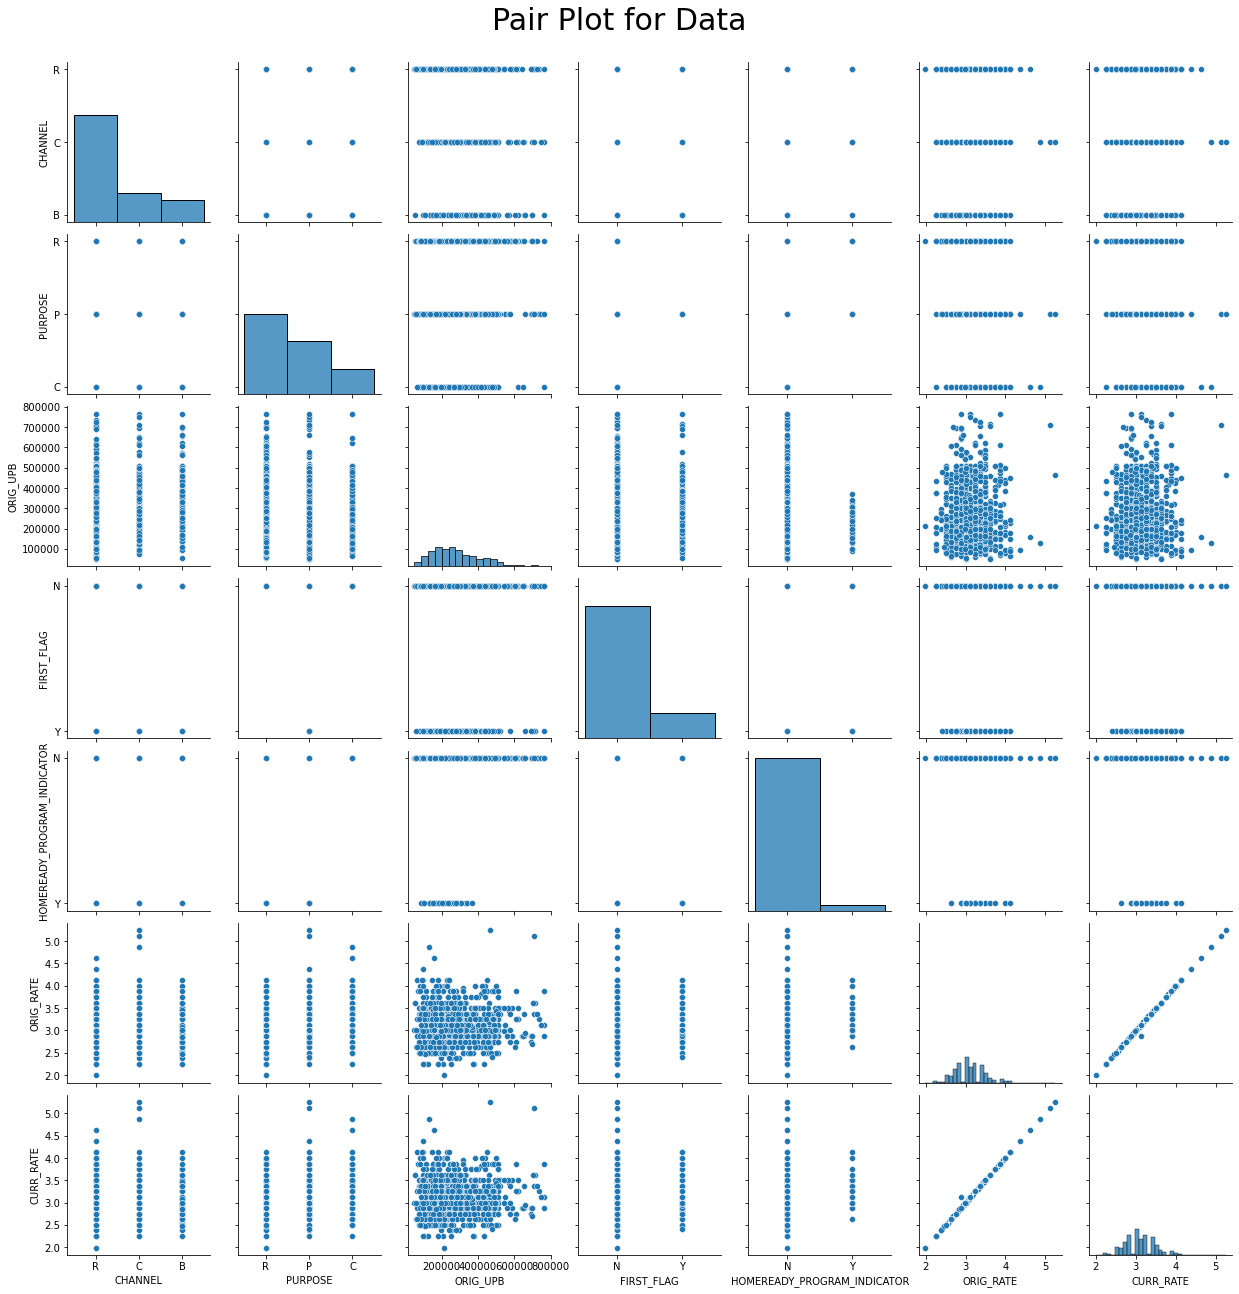

In [18]:
plt.figure(figsize=(15,10))
pp = sns.pairplot(data = df.to_pandas().sample(1000), vars=['CHANNEL','PURPOSE','ORIG_UPB','FIRST_FLAG','HOMEREADY_PROGRAM_INDICATOR','ORIG_RATE', 'CURR_RATE'])
pp.fig.suptitle("Pair Plot for Data",fontsize=30,horizontalalignment='center', y=1.03)
plt.show()

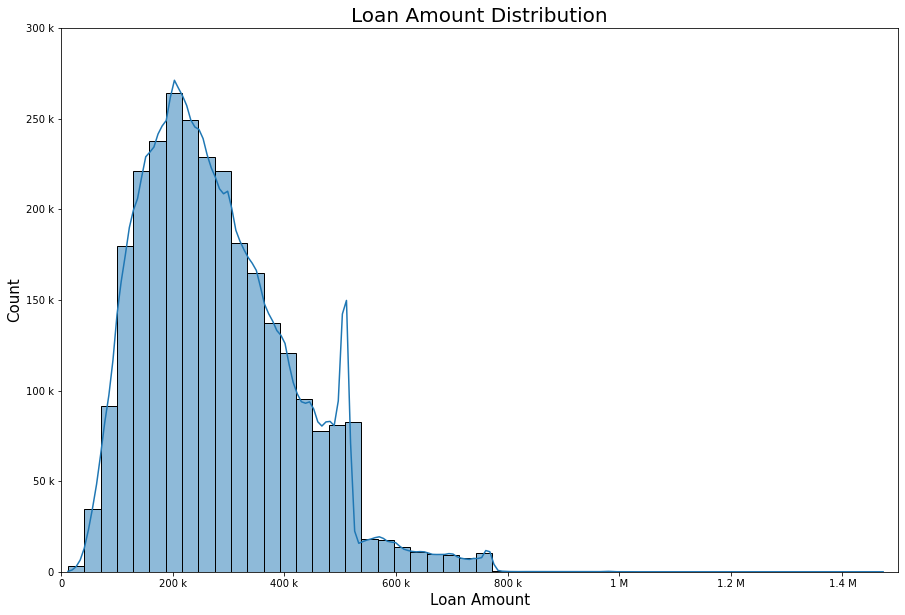

In [19]:
# plot histplot to see loan amount distribution 
fig, ax = plt.subplots(figsize=(15,10))    
palette = sns.color_palette("bright", 6)
# plot using sns
sns.histplot(df['ORIG_UPB'].to_pandas(),stat='count',kde=True,bins=50).set_title("Loan Amount Distribution",fontsize=20,horizontalalignment='center')
# change labels
plt.xlabel('Loan Amount',fontsize=15)
plt.ylabel('Count',fontsize=15)
# set x & y limits
ax.set(xlim = (0,1500000))
ax.set(ylim = (0,300000))
# fix limits format 
ax.xaxis.set_major_formatter(ticker.EngFormatter())
ax.yaxis.set_major_formatter(ticker.EngFormatter())

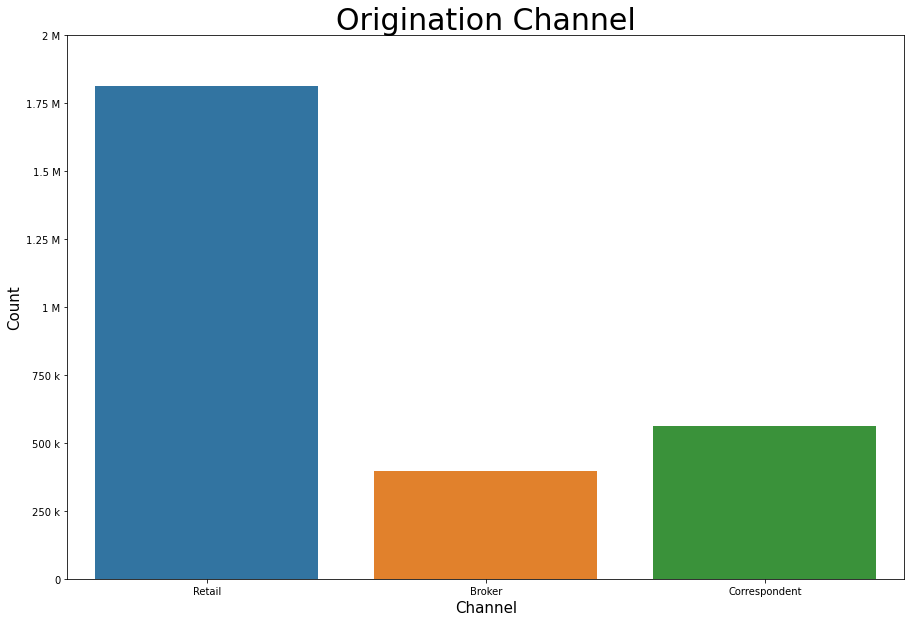

In [20]:
# plot to see channel types
fig, ax = plt.subplots(figsize=(15,10))    
palette = sns.color_palette("bright", 6)
# plot using sns
sns.countplot(df['CHANNEL'].to_pandas()).set_title("Origination Channel",fontsize=30)
# change xticks labels
plt.xticks(np.arange(3),('Retail','Broker','Correspondent'))
# change labels
plt.xlabel('Channel',fontsize=15)
plt.ylabel('Count',fontsize=15)
# set x & y limits
ax.set(ylim = (0,2000000))
# fix limits format 
ax.yaxis.set_major_formatter(ticker.EngFormatter())

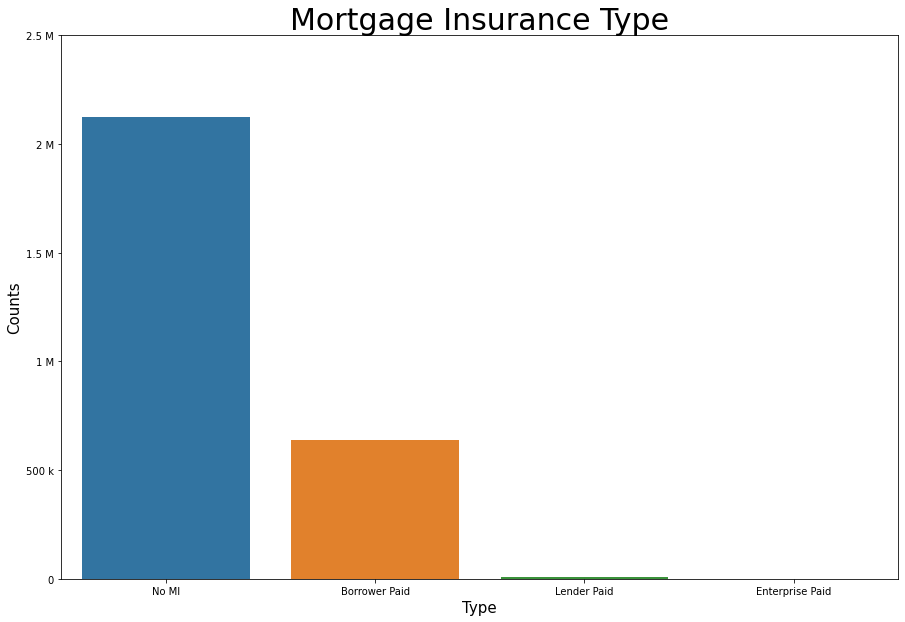

In [21]:
fig, ax = plt.subplots(figsize=(15,10))    
palette = sns.color_palette("bright", 6)
# plot using sns
sns.countplot(x='MI_TYPE', data=df.to_pandas()).set_title("Mortgage Insurance Type",fontsize=30)
# change xticks labels
plt.xticks(np.arange(4),('No MI','Borrower Paid','Lender Paid','Enterprise Paid'))
# change labels
plt.xlabel('Type',fontsize=15)
plt.ylabel('Counts',fontsize=15)
# set x & y limits
ax.set(ylim = (0,2500000))
# fix limits format 
ax.yaxis.set_major_formatter(ticker.EngFormatter())

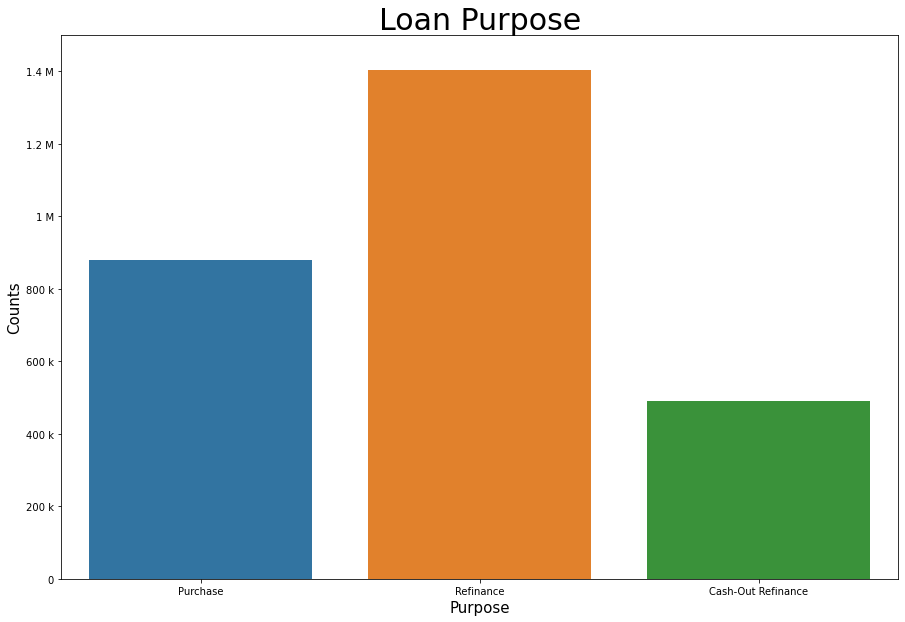

In [22]:
fig, ax = plt.subplots(figsize=(15,10))    
palette = sns.color_palette("bright", 6)
# plot using sns
sns.countplot(x='PURPOSE', data=df.to_pandas()).set_title("Loan Purpose",fontsize=30)
# change xticks labels
plt.xticks(np.arange(3),('Purchase','Refinance','Cash-Out Refinance'))
# change labels
plt.xlabel('Purpose',fontsize=15)
plt.ylabel('Counts',fontsize=15)
# set x & y limits
ax.set(ylim = (0,1500000))
# fix limits format 
ax.yaxis.set_major_formatter(ticker.EngFormatter())

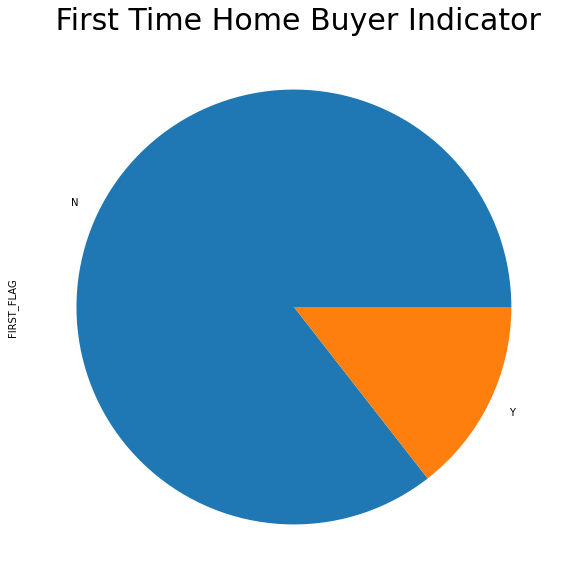

In [23]:
#plot the pie chart of FIRST_FLAG categories
plt.figure(figsize=(15,10))
df.FIRST_FLAG.to_pandas().value_counts(normalize=True).plot.pie().set_title(" First Time Home Buyer Indicator",fontsize=30)
plt.show()

# Choose Target Column

In [24]:
'''High Balance Loan Indicator An indicator that denotes if the original principal balance of a mortgage loan is greater than the
general conforming loan limit and up to the high-cost area loan limit.'''

df.HIGH_BALANCE_LOAN_INDICATOR.unique()

0    N
1    Y
Name: HIGH_BALANCE_LOAN_INDICATOR, dtype: object

In [25]:
'''HomeReady® Program Indicator An indicator that denotes if the borrower participated in Fannie Mae’s HomeReady program.
HomeReady is our affordable, low down payment mortgage product designed to expand the
availability of mortgage financing to creditworthy low-to-moderate-income borrowers.'''

df.HOMEREADY_PROGRAM_INDICATOR.value_counts()

N    2675532
Y      96461
Name: HOMEREADY_PROGRAM_INDICATOR, dtype: int32

In [26]:
"""Relocation Mortgage Indicator An indicator that denotes whether or not the type of mortgage loan is a relocation mortgage loan,
made to borrowers whose employers relocate their employees."""

df.RELOCATION_MORTGAGE_INDICATOR.unique()
df.RELOCATION_MORTGAGE_INDICATOR.value_counts()

N    2766914
Y       5079
Name: RELOCATION_MORTGAGE_INDICATOR, dtype: int32

In [27]:
# numric target 
'''Original UPB The dollar amount of the loan as stated on the note at the time the loan was originated.'''
df.ORIG_UPB.unique()

0        12000.0
1        14000.0
2        15000.0
3        16000.0
4        17000.0
         ...    
982    1400000.0
983    1452000.0
984    1458000.0
985    1470000.0
986    1473000.0
Name: ORIG_UPB, Length: 987, dtype: float64

### So create model that will predict ORIG_UPB value [Loan Amount]

# Encode Data for ML

In [28]:
# I used get_dummies since data dont have ordinal columns 
df_ml = cudf.get_dummies(df)

## Change all data types to float32

In [29]:
# data dtypes before change 
df_ml.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 2771993 entries, 0 to 2771992
Columns: 188 entries, LOAN_ID to ADR_TYPE_C
dtypes: float64(15), int64(11), uint8(162)
memory usage: 978.1 MB


In [30]:
df_ml = df_ml.astype(np.float32)

In [31]:
# data dtypes after change 
df_ml.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 2771993 entries, 0 to 2771992
Columns: 188 entries, LOAN_ID to ADR_TYPE_C
dtypes: float32(188)
memory usage: 1.9 GB


In [32]:
# Save ML ver of data for future use 
# df_ml.to_csv(r'ML_2020Q3Mortage.csv', index = False)

# Split Data 

In [33]:
from cuml.preprocessing import train_test_split

In [34]:
# split data to train/test
X = df_ml.drop(['LOAN_ID','ORIG_UPB'], axis=1)
y = df_ml.ORIG_UPB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [35]:
# delete unused further data to free up GPU memory
del df_ml , X ,y

# Baseline Model

In [36]:
# create baseline model  
def baseline_model(n_preds, pred):
    # just predict the average
    return cudf.Series([pred for n in range(n_preds)])

# make baseline preds
baseline_preds = baseline_model(len(y_test), np.mean(y_train)).astype(np.float32) # had to fix preds type from float64 to float32

In [37]:
# evaluate model
from cuml.metrics import mean_squared_error
mean_squared_error(y_true=y_test,
                   y_pred=baseline_preds,
                   squared=False)

array(134917.69, dtype=float32)

# Random Forest Regressor Model

In [38]:
# create & fit model
from cuml.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

RandomForestRegressor(split_criterion=2, accuracy_metric='r2', handle=<cuml.raft.common.handle.Handle object at 0x7fcb722f7f70>, verbose=4, output_type='input')

In [39]:
# model prediction
preds = rfr.predict(X_test)

In [40]:
preds.tail(5)

554393    239384.531250
554394    331366.250000
554395    625081.875000
554396    104114.367188
554397    158580.250000
dtype: float32

In [41]:
# evaluate model
from cuml.metrics import mean_squared_error
mean_squared_error(y_true=y_test,
                   y_pred=preds,
                   squared=False) # off by $22,663.648

array(22663.648, dtype=float32)

#### Run time 6min
### Random Forest Model preform good 

## Plot Model Results

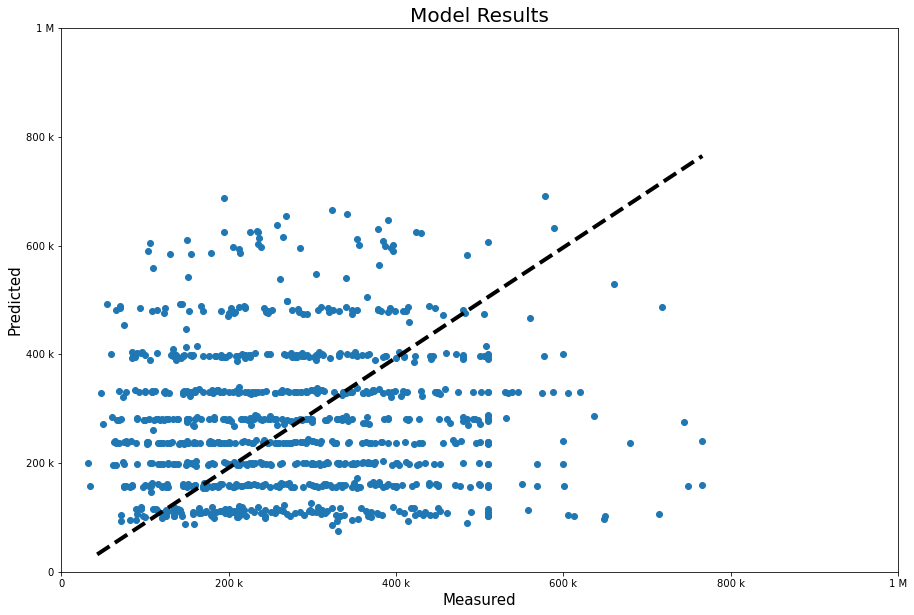

In [52]:
#plot with line
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(y_test.to_pandas().sample(1000), preds.to_pandas().sample(1000))
ax.plot([y_test.to_pandas().sample(1000).min(),y_test.to_pandas().sample(1000).max()], [y_test.to_pandas().sample(1000).min(), y_test.to_pandas().sample(1000).max()], 'k--', lw=4)
plt.title('Model Results', size=20)
ax.set_xlabel('Measured', size=15)
ax.set_ylabel('Predicted', size=15)

# set x & y limits
ax.set(xlim = (0,1000000))
ax.set(ylim = (0,1000000))
# fix limits format 
ax.xaxis.set_major_formatter(ticker.EngFormatter())
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

# Enhance Model
### Tried different parameters for the model but the model perform better with the default parameters. 

In [43]:
# create & fit model
from cuml.ensemble import RandomForestRegressor

rfr2 = RandomForestRegressor(n_estimators = 160,
                            accuracy_metric='mse',
                            max_depth = 20,
                            min_samples_leaf = 50,
                            max_features = 'sqrt'
                           )

rfr2.fit(X_train, y_train)

RandomForestRegressor(split_criterion=2, accuracy_metric='mse', handle=<cuml.raft.common.handle.Handle object at 0x7fcb9032fcd0>, verbose=4, output_type='input')

In [44]:
# model prediction
preds2 = rfr2.predict(X_test)

In [45]:
preds2.tail(5)

554393    260682.031250
554394    329320.843750
554395    521918.500000
554396    185227.484375
554397    207283.437500
dtype: float32

In [46]:
# evaluate model
from cuml.metrics import mean_squared_error
mean_squared_error(y_true=y_test,
                   y_pred=preds2,
                   squared=False) # off by 22,696.613$

array(66342.09, dtype=float32)

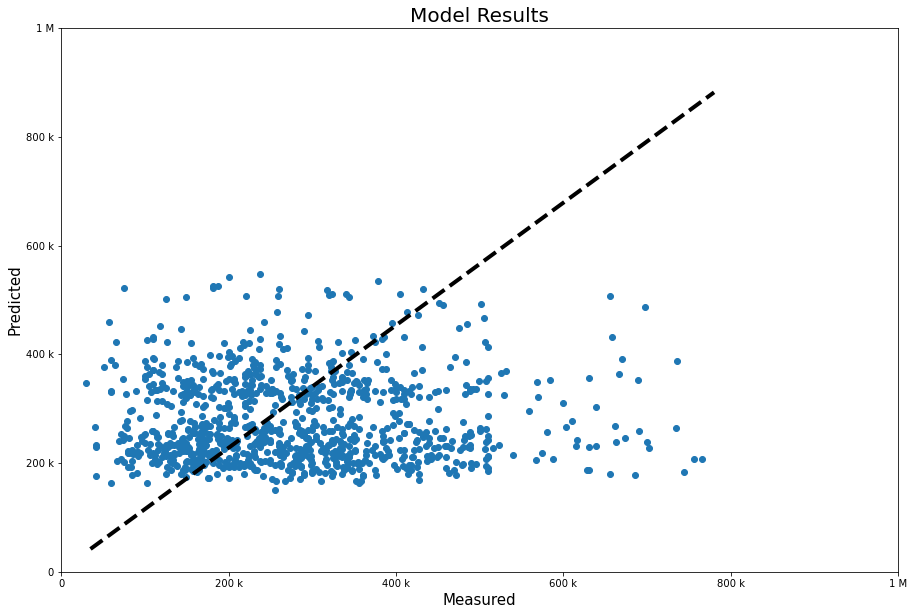

In [53]:
#plot with line
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(y_test.to_pandas().sample(1000), preds2.to_pandas().sample(1000))
ax.plot([y_test.to_pandas().sample(1000).min(),y_test.to_pandas().sample(1000).max()], [y_test.to_pandas().sample(1000).min(), y_test.to_pandas().sample(1000).max()], 'k--', lw=4)
plt.title('Model Results', size=20)
ax.set_xlabel('Measured', size=15)
ax.set_ylabel('Predicted', size=15)

# set x & y limits
ax.set(xlim = (0,1000000))
ax.set(ylim = (0,1000000))
# fix limits format 
ax.xaxis.set_major_formatter(ticker.EngFormatter())
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()